In [1]:
library(Seurat)
library(ggplot2)
library(dplyr)
library(patchwork)
library(ggplot2)
setwd("~/dev/CCRItask")


Loading required package: SeuratObject

Loading required package: sp


Attaching package: 'SeuratObject'


The following objects are masked from 'package:base':

    intersect, t



Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




## Load the integrated data

In [2]:
integrated <- readRDS("data/processed/integrated.rds")

## Perfrom Clustering

In [75]:
integrated <- FindNeighbors(integrated, dims = 1:30)
integrated <- FindClusters(integrated, resolution = 0.1) 

Computing nearest neighbor graph



Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 14367
Number of edges: 585208

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9763
Number of communities: 10
Elapsed time: 1 seconds


In [76]:
head(integrated[[]])

,orig.ident,nCount_RNA,nFeature_RNA,sample,week,sample_id,gsm_id,condition,percent.mt,S.Score,...,Chromaffin cells2,Sympathoblasts3,Adrenal gland cortex4,Melanocytes5,Subepicardial and abdominal mesenchyme6,Endothelium7,Intermediate mesoderm8,HSCs9,Immune cells10,Erythroid cells11
,<chr>,<dbl>,<int>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AAACGAAGTCGCAACC-1_1,week8_001,19833,4507,week8_001,8,001,GSM4446535,regular,9.716130,-0.01364047,...,-0.14129300,-0.5080621,1.67089888,0.0326211183,0.29426408,-0.4431200,-0.20216909,0.105189581,-0.060890255,0.3388640
AAACGCTGTATTCCGA-1_1,week8_001,5589,2236,week8_001,8,001,GSM4446535,regular,3.954196,-0.09599133,...,0.59343912,0.7894192,-0.24728034,-0.0006182116,-0.11857952,-0.2599059,0.68567353,-0.008476158,-0.170758871,0.5059003
AAAGAACAGCAGGCAT-1_1,week8_001,3190,1568,week8_001,8,001,GSM4446535,regular,1.818182,-0.08865610,...,-0.08161358,-0.3342263,-0.11572547,-0.0532104885,-0.08130443,0.4443260,-0.07335108,-0.003884757,0.012758430,0.5527115
AAAGGATAGAGTTGCG-1_1,week8_001,6259,2271,week8_001,8,001,GSM4446535,regular,4.649305,-0.06551007,...,-0.08635668,-0.4155208,-0.15440577,-0.0040281187,-0.04477148,0.7972334,-0.06498588,-0.003943301,-0.004728292,0.8471416
AAAGGATTCTAGCATG-1_1,week8_001,4952,2206,week8_001,8,001,GSM4446535,regular,4.886914,-0.14780168,...,0.50377614,2.3523692,-0.37755356,-0.1007411528,-0.13081686,-0.3003090,0.81301879,-0.021082435,-0.092332716,1.5798143
AAAGGGCAGCAATAAC-1_1,week8_001,5899,2103,week8_001,8,001,GSM4446535,regular,3.492117,-0.05625947,...,-0.13103078,-0.1794684,0.01292503,0.0390256317,0.01696680,-0.2672168,-0.04441067,-0.012546656,0.011195558,1.8073273


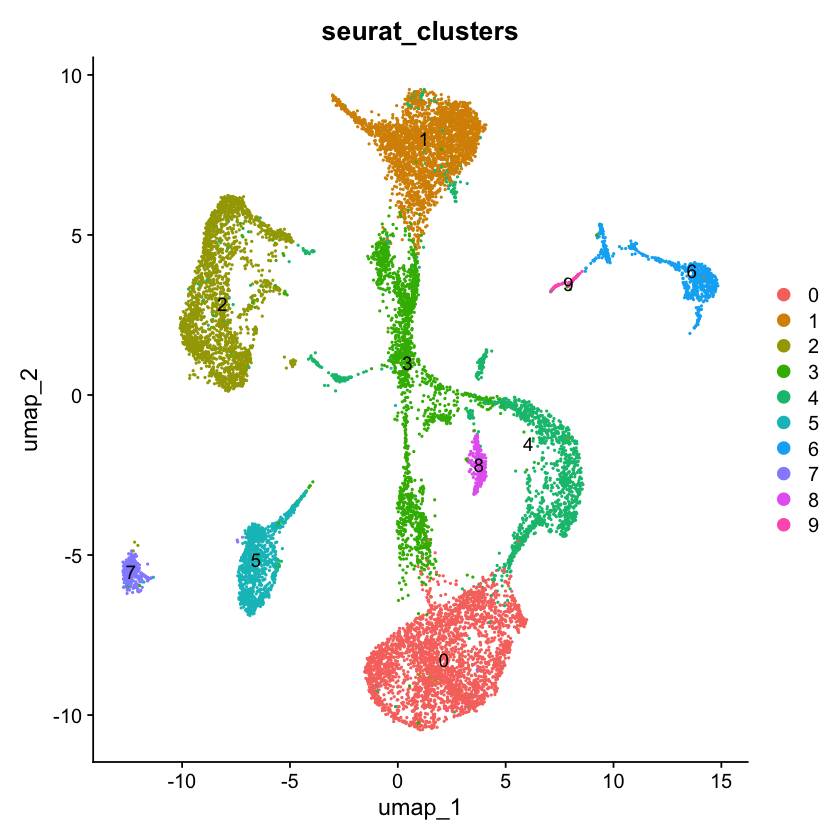

In [77]:
DimPlot(integrated,reduction = "umap", group.by = "seurat_clusters", label = TRUE)

## Cluster annotation

From the https://www.nature.com/articles/s41588-021-00818-x

In [78]:
cell_type_markers <- list(
  "SCPs" = c("SOX10", "PLP1", "FOXD3"),
  "Chromaffin cells" = c("ELAVL3", "ELAVL4", "PHOX2B", "TH"),
  "Sympathoblasts" = c("STMN2"),
  "Adrenal gland cortex" = c("NR5A1"),
  "Melanocytes" = c("MITF"),
  #"Kidney" = c("PAX2"),
  "Subepicardial and abdominal mesenchyme" = c("PRRX1"),
  "Endothelium" = c("PECAM1", "KDR"),
  "Intermediate mesoderm" = c("GATA4", "HAND2"),
  #"Liver" = c("HNF4A", "AHSG"),
  "HSCs" = c("SPINK2"), # AZU1
  "Immune cells" = c("FCGR1A", "CD163"),
  "Erythroid cells" = c("HBA2", "HBB")
)

markers_unique  = unique(unlist(cell_type_markers))


In [79]:
length(unique(unlist(cell_type_markers)))

[1] 20

## Dotplot to map clusters to cell types

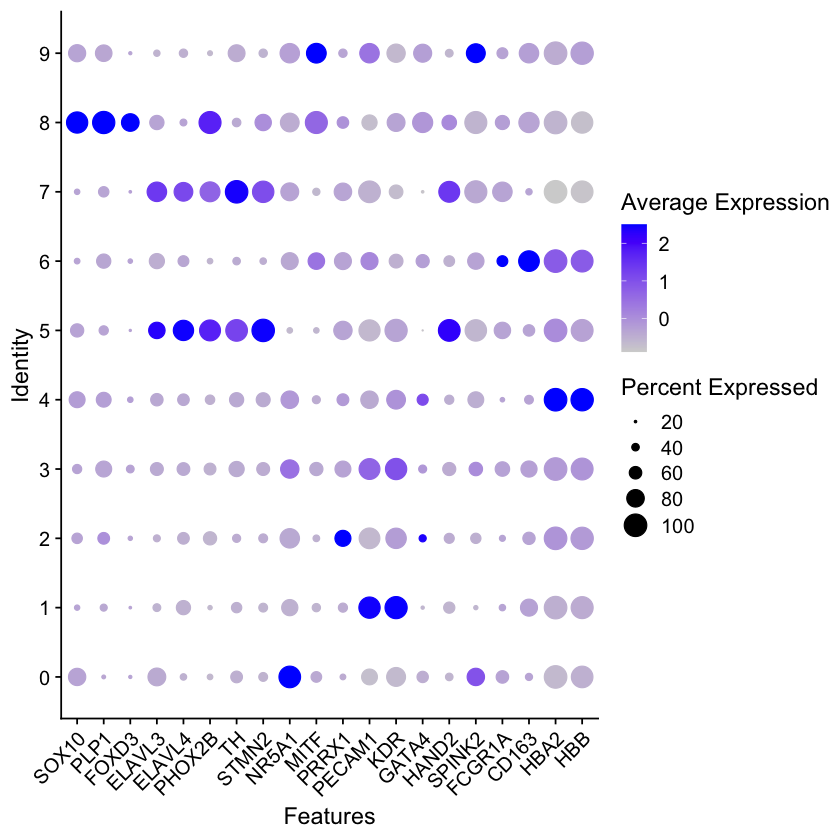

In [80]:
DotPlot(integrated, features = unique(unlist(cell_type_markers))) + RotatedAxis()

in depth analysis for manual annotation

SCPs

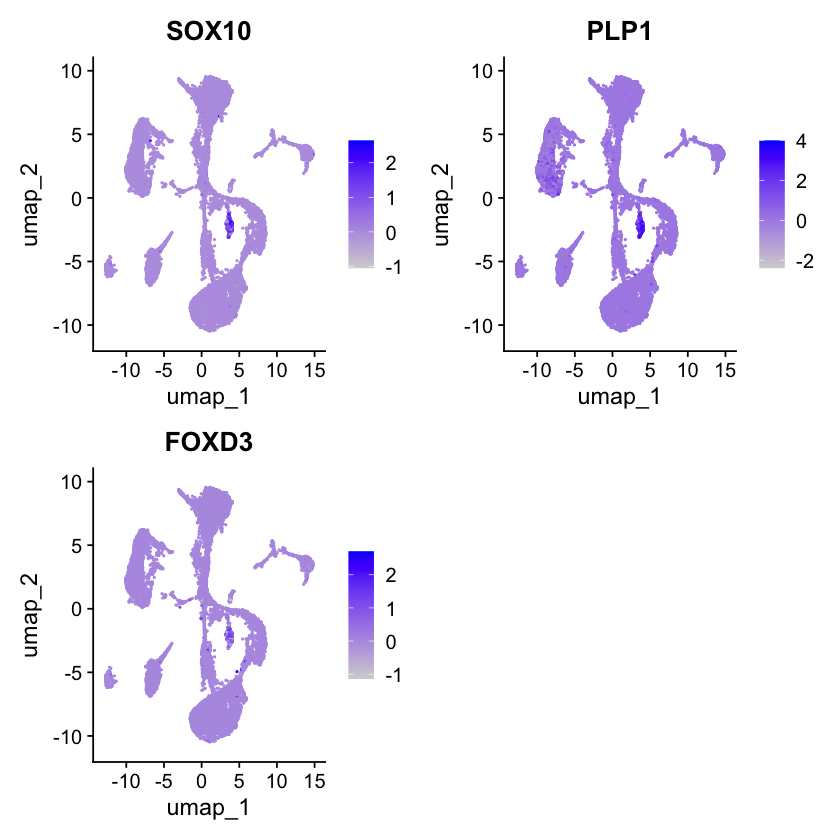

In [61]:
FeaturePlot(integrated, c("SOX10", "PLP1", "FOXD3"), ncol=2, raster.dpi = c(800,100))

chromaffin cells

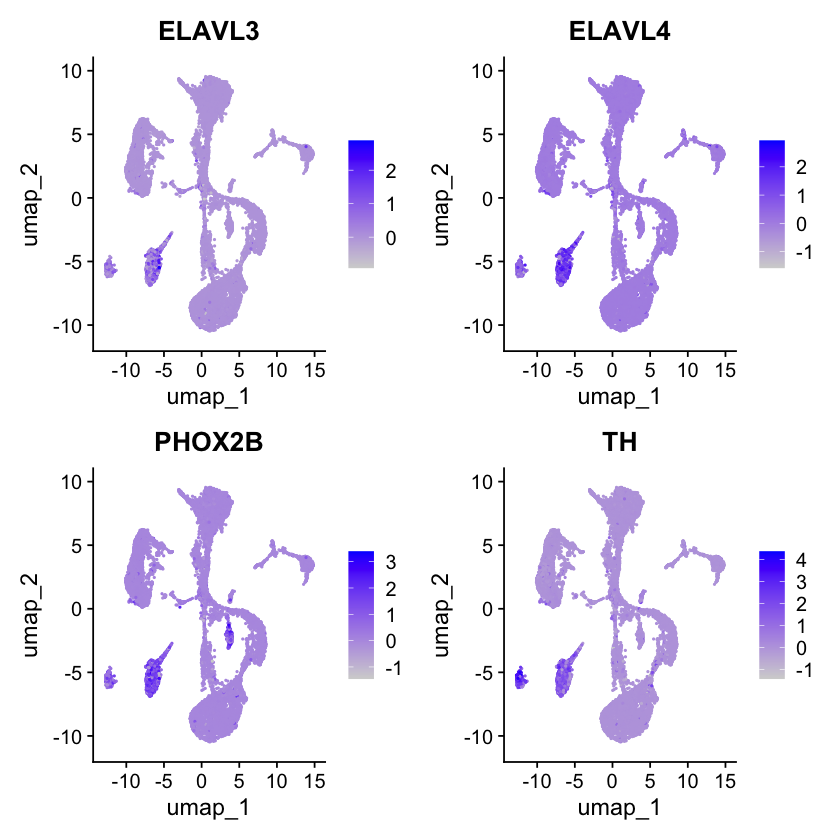

In [ ]:
FeaturePlot(integrated, c("ELAVL3", "ELAVL4", "PHOX2B", "TH"), ncol=2, raster.dpi = c(800,100))

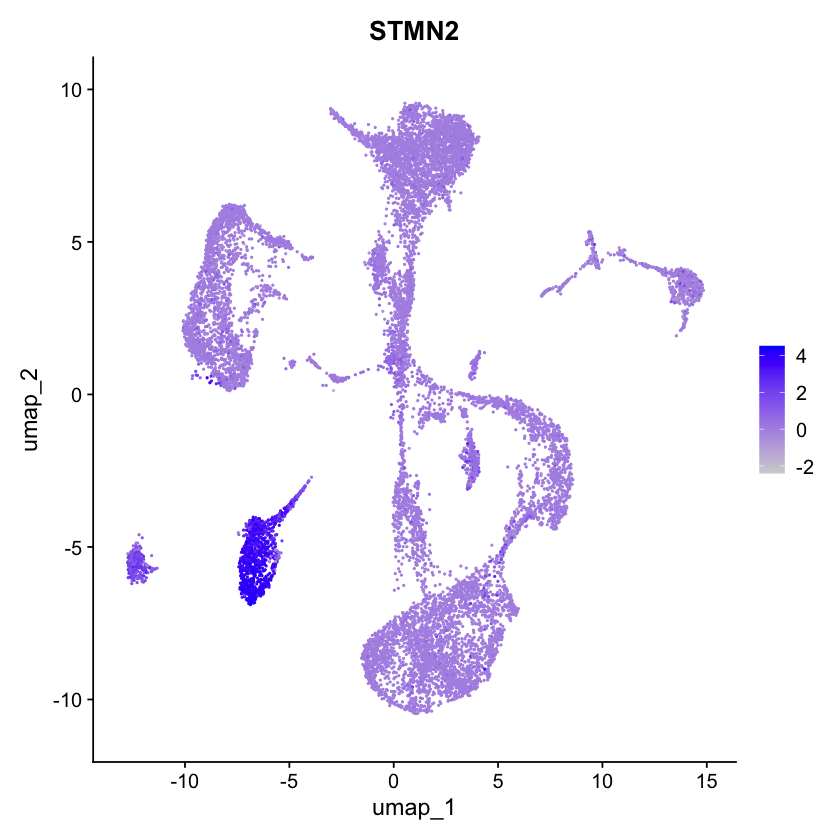

In [71]:
FeaturePlot(integrated, c("STMN2"), ncol=1, raster.dpi = c(800,100))

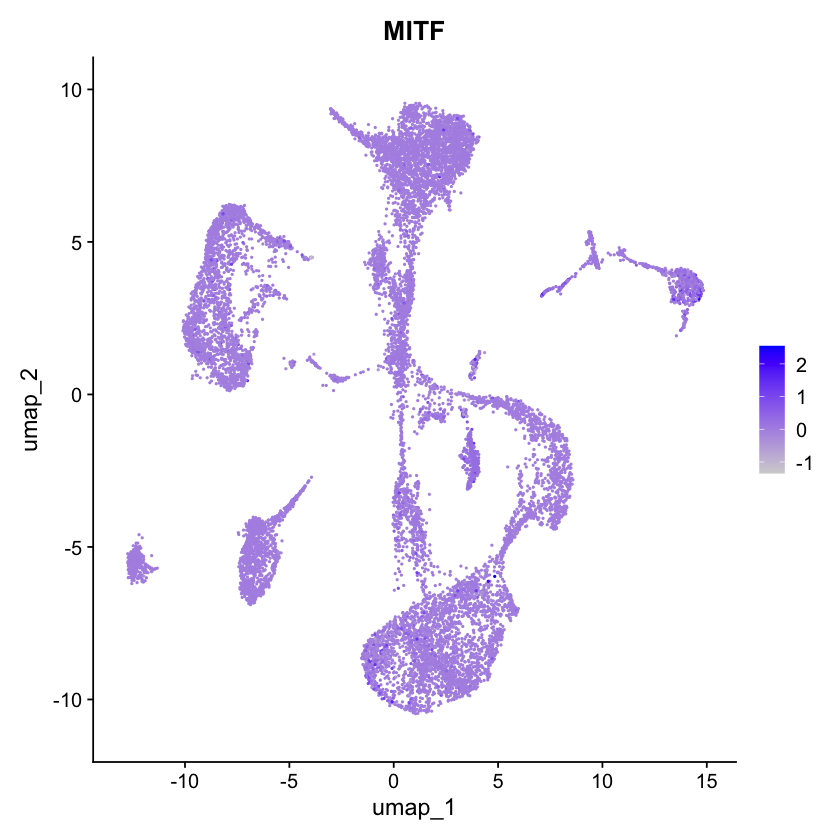

In [70]:
FeaturePlot(integrated, c("MITF"), ncol=1, raster.dpi = c(800,100))

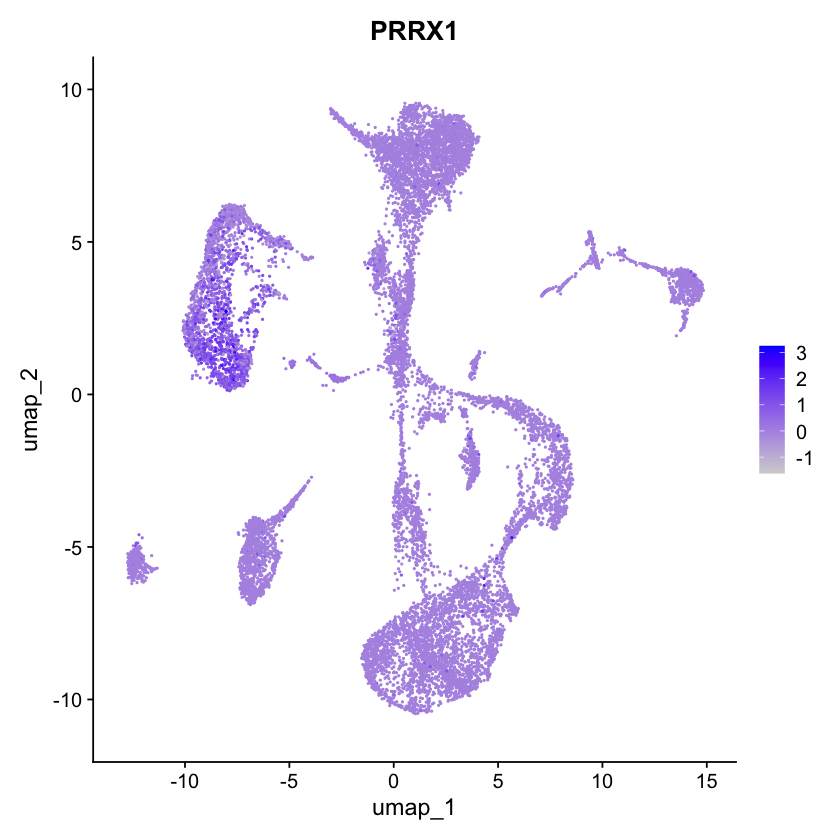

In [72]:
FeaturePlot(integrated, c("PRRX1"), ncol=1, raster.dpi = c(800,100))

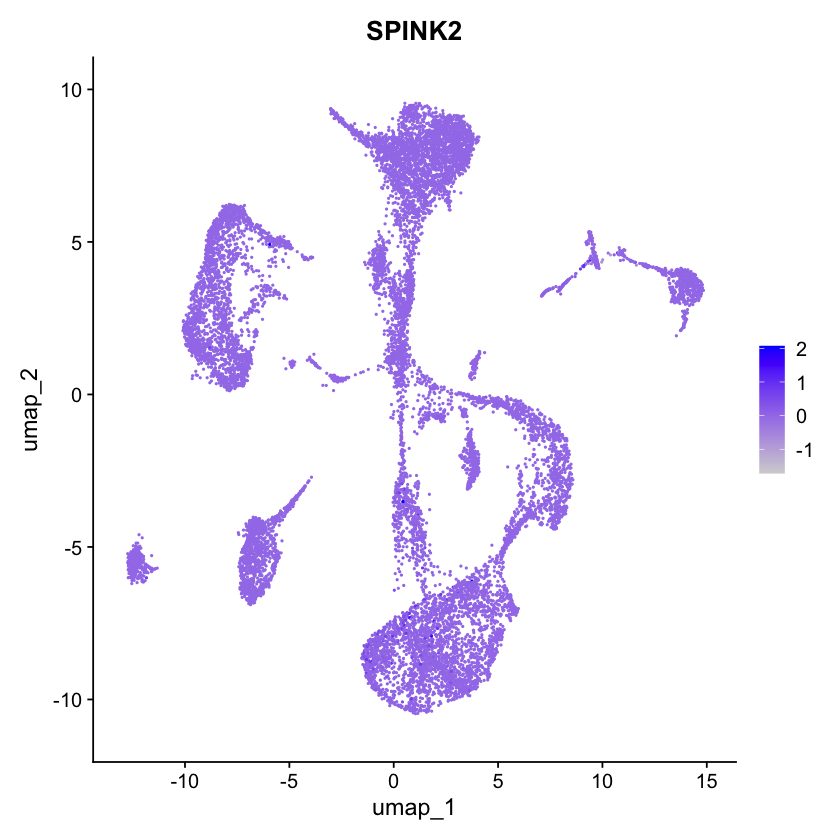

In [74]:
FeaturePlot(integrated, c("SPINK2"), ncol=1, raster.dpi = c(800,100))

In [84]:
cluster <- list(
  "8" = "SCPs", #= c("SOX10", "PLP1", "FOXD3"),
  "7" = "Chromaffin cells", #= c("ELAVL3", "ELAVL4", "PHOX2B", "TH"),
  "5"= "Sympathoblasts", #= c("STMN2"),
  "0" = "Adrenal gland cortex", #= c("NR5A1"),
  "9" = "Melanocytes", #= c("MITF"),
  #"Kidney" = c("PAX2"),
  "2" = "Subepicardial and abdominal mesenchyme",# = c("PRRX1"),
  "1" = "Endothelium", #= c("PECAM1", "KDR"),
  #= "Intermediate mesoderm", = #c("GATA4", "HAND2"),
  #"Liver" = c("HNF4A", "AHSG"),
  #= "HSCs", = #c("SPINK2"), # AZU1
  "6" = "Immune cells", #= #c("FCGR1A", "CD163"),
  "4" = "Erythroid cells" #= #c("HBA2", "HBB")
)


In [ ]:
# Convert list to a character vector for easier handling
cluster <- unlist(cluster)

# Rename the identities in your Seurat object
integrated <- RenameIdents(integrated, cluster)

# (Optional) Save the renamed cluster identities as metadata
integrated$celltype <- Idents(integrated)

ERROR: Error in RenameIdents.Seurat(integrated, cluster): Cannot find any of the provided identities


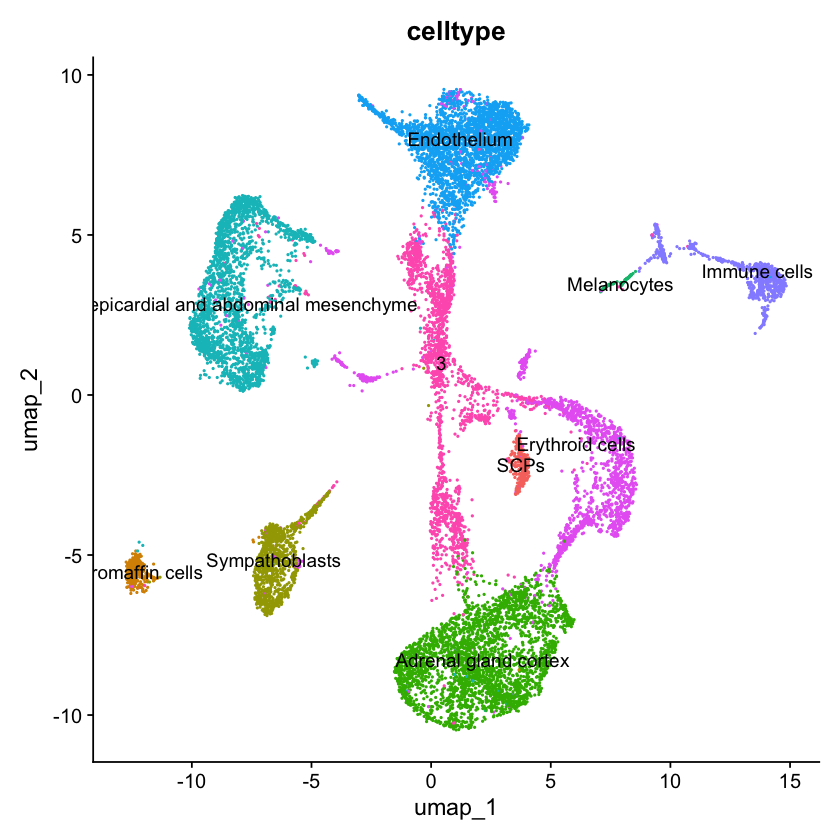

In [123]:
umap_ann <- DimPlot(integrated, group.by = "celltype", label = TRUE) + NoLegend()
umap_ann

In [124]:
ggsave("plots/umap_annotated.pdf", umap_ann, width = 10, height = 10)

## Automatic cluster annotation

did not work properly

In [41]:
# Score each cell for each cell type based on marker genes
integrated <- AddModuleScore(
  integrated,
  features = cell_type_markers,
  name = names(cell_type_markers),
  ctrl = 20,  # Reduce from default 100 if needed
  replace = TRUE
)

In [ ]:

install.packages('devtools')
devtools::install_github('immunogenomics/presto')

## Dot Plot for top5 markers for each cluster

In [97]:
# Find all markers for each cluster
markers <- FindAllMarkers(object = integrated,
                          only.pos = TRUE,    # Only consider positive markers
                          min.pct = 0.25,     # Minimum detection fraction
                          logfc.threshold = 0.25)  # Minimum log fold change

Calculating cluster SCPs

Warning message in mean.fxn(object[features, cells.1, drop = FALSE]):
"NaNs produced"
Calculating cluster Chromaffin cells

Warning message in mean.fxn(object[features, cells.1, drop = FALSE]):
"NaNs produced"
Calculating cluster Sympathoblasts

Warning message in mean.fxn(object[features, cells.1, drop = FALSE]):
"NaNs produced"
Warning message in mean.fxn(object[features, cells.2, drop = FALSE]):
"NaNs produced"
Calculating cluster Adrenal gland cortex

Warning message in mean.fxn(object[features, cells.1, drop = FALSE]):
"NaNs produced"
Calculating cluster Melanocytes

Warning message in mean.fxn(object[features, cells.1, drop = FALSE]):
"NaNs produced"
Calculating cluster Subepicardial and abdominal mesenchyme

Warning message in mean.fxn(object[features, cells.1, drop = FALSE]):
"NaNs produced"
Calculating cluster Endothelium

Warning message in mean.fxn(object[features, cells.1, drop = FALSE]):
"NaNs produced"
Calculating cluster Immune cells

Warning me

In [98]:
head(markers)

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
CDH19,3.158391e-188,9.811790,0.973,0.205,6.316783e-185,SCPs,CDH19
COL20A1,1.009264e-187,8.750288,0.987,0.352,2.018528e-184,SCPs,COL20A1
S100B,1.538148e-187,8.133198,0.993,0.539,3.076296e-184,SCPs,S100B
NRXN3,1.012568e-186,6.517007,0.997,0.583,2.025136e-183,SCPs,NRXN3
NRXN1,1.638946e-186,6.372833,0.997,0.454,3.277891e-183,SCPs,NRXN1
MPIG6B,7.066056e-186,4.804866,0.990,0.628,1.413211e-182,SCPs,MPIG6B


In [99]:
# Get top 5 markers per cluster
top5 <- markers %>% 
  group_by(cluster) %>% 
  top_n(n = 5, wt = avg_log2FC) %>%
  arrange(cluster, desc(avg_log2FC))

In [100]:
head(top5)

p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
3.158391e-188,9.811790,0.973,0.205,6.316783e-185,SCPs,CDH19
1.009264e-187,8.750288,0.987,0.352,2.018528e-184,SCPs,COL20A1
1.286751e-177,8.601932,0.977,0.439,2.573503e-174,SCPs,MPZ
2.817512e-162,8.288535,0.947,0.547,5.635024e-159,SCPs,SOX10
5.187759e-172,8.236993,0.967,0.346,1.037552e-168,SCPs,ERBB3
5.269410e-203,8.391946,0.982,0.481,1.053882e-199,Chromaffin cells,PENK


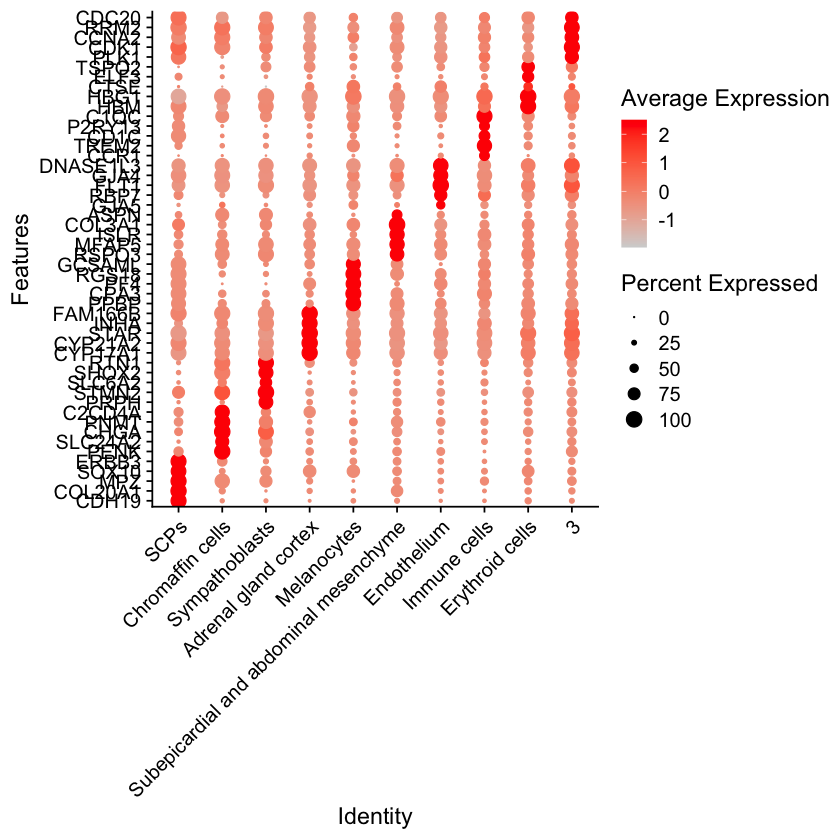

In [116]:
# Create dot plot
dp <- DotPlot(object = integrated, 
        features = unique(top5$gene),  # Use the unique genes from top5
        cols = c("lightgrey", "red"), # to match the paper
        dot.scale = 4) +               # Adjust dot size

  coord_flip()+
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) 
dp

In [122]:
ggsave("plots/dotplot_top5_perCluster.pdf", dp, width = 8, height = 16)

In [125]:
saveRDS(integrated, "data/processed/integrated_annotated.rds")